In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # For 2D visualization
from sklearn.metrics import silhouette_score  # For evaluation

In [4]:
# Loading the dataset
df = pd.read_csv('/content/Mall_Customers.csv')  # Make sure the file is in the same directory

# Display first 5 rows
print(df.head())

# Checking for missing values
print("\nMissing values:\n", df.isnull().sum())

# Selecting relevant features (Annual Income & Spending Score)
X = df.iloc[:, [3, 4]].values  # Using only 2 features for easier visualization

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
#Standardize the Data (Important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

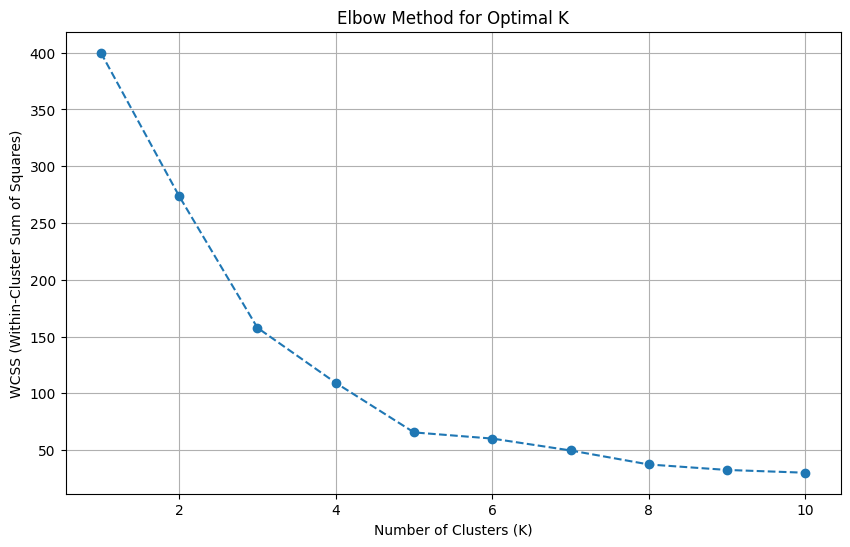

In [6]:
#Finding Optimal K Using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares (WCSS)

# Try K from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

In [7]:
#Apply K-Means with Optimal K
# Fit K-Means with K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = clusters
print("\nFirst 5 rows with cluster labels:\n", df.head())


First 5 rows with cluster labels:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


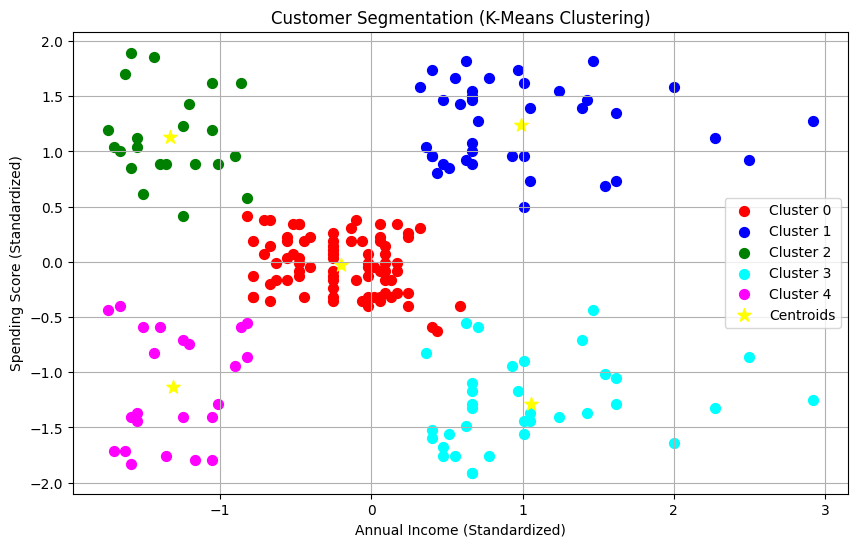

In [8]:
#Visualize the Clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(5):
    plt.scatter(
        X_scaled[clusters == i, 0],  # Annual Income
        X_scaled[clusters == i, 1],  # Spending Score
        s=50, c=colors[i],
        label=f'Cluster {i}'
    )

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=100, c='yellow',
    marker='*', label='Centroids'
)

plt.title('Customer Segmentation (K-Means Clustering)')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend()
plt.grid()
plt.show()